## Gender Classification

The following example shows how NLTK uses features for gender classification of names.

In [1]:
import nltk
nltk.download("names")
from nltk.corpus import names

[nltk_data] Downloading package names to /home/diego/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
m = names.words('male.txt')
len(m)

2943

In [3]:
f = names.words('female.txt')
len(f)

5001

### Creation of a training set and a test set

In [4]:
import random
random.seed(1234) # Set the seed to facilitate replicability
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names, devtest_names, test_names = names[1000:], names[500:1000], names[:500]
print("Size of training set:", len(train_names))
print(train_names[:3])
print("Size of devtest set:", len(devtest_names))
print(devtest_names[:3])
print("Size of test set:", len(test_names))
print(test_names[:3])

Size of training set: 6944
[('Marna', 'female'), ('Thadeus', 'male'), ('Jereme', 'male')]
Size of devtest set: 500
[('Ranice', 'female'), ('Faunie', 'female'), ('Holly-Anne', 'female')]
Size of test set: 500
[('Butler', 'male'), ('Umberto', 'male'), ('Aloysius', 'male')]


In [5]:
def ratio_gender(data,gender):
    genders = [g for (n,g) in data if g == gender]
    return len(genders)/len(data)
print("Train data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(train_names, 'male'),
                                       ratio_gender(train_names, 'female')))
print("Devtest data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(devtest_names, 'male'),
                                       ratio_gender(devtest_names, 'female')))
print("Test data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(test_names, 'male'),
                                       ratio_gender(test_names, 'female')))

Train data
Males: 0.369 Females: 0.631
Devtest data
Males: 0.362 Females: 0.638
Test data
Males: 0.400 Females: 0.600


### Extraction of features

In [6]:
def gender_features(word):
   return {'last_letter': word[-1]}

In [7]:
gender_features('John')

{'last_letter': 'n'}

In [8]:
gender_features('Mary')

{'last_letter': 'y'}

In [9]:
train_set = [(gender_features(n), g) for n, g in train_names]
devtest_set = [(gender_features(n), g) for n, g in devtest_names]
test_set = [(gender_features(n), g) for n, g in test_names]

### Training a classifier

In [10]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

### Testing the classifier

In [11]:
classifier.classify(gender_features('Neo'))

'male'

In [12]:
classifier.classify(gender_features('Trinity'))

'female'

In [13]:
nltk.classify.accuracy(classifier, test_set)

0.776

### Error analysis
We use the **devtest set** so that we can examine the classification errors of data that are not seen by the classifier at training time.

In [14]:
print("Accuracy of dev-test set:", nltk.classify.accuracy(classifier, devtest_set))
false_males = []
false_females = []
for name, tag in devtest_names:
    guess = classifier.classify(gender_features(name))
    if tag == 'female' and guess == 'male':
        false_males.append(name)
    elif tag == 'male' and guess == 'female':
        false_males.append(name)
print("Number of false males:", len(false_males))
print("Number of false females:", len(false_females))

Accuracy of dev-test set: 0.756
Number of false males: 122
Number of false females: 0


In [15]:
print("False males:")
for m in false_males[:5]:
    print(m)

False males:
Emmery
Winny
Kim
Alaa
Nate


## A revised gender classifier

In [16]:
def gender_features2(word):
       return {'suffix1': word[-1:],
               'suffix2': word[-2:]}
train_set2 = [(gender_features2(n), g) for n, g in train_names]
devtest_set2 = [(gender_features2(n), g) for n, g in devtest_names]
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2, devtest_set2)

0.77

## Overfitting

In [17]:
def gender_features3(name):
      features = {}
      features['firstletter'] = name[0].lower()
      features['lastletter'] = name[-1]
      for letter in 'abcdefghijklmnopqrstuvwxyz':
         features['count(%s)' % letter] = name.lower().count(letter)
         features['has(%s)' % letter] = (letter in name.lower())
      return features

gender_features3('John')

{'firstletter': 'j',
 'lastletter': 'n',
 'count(a)': 0,
 'has(a)': False,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 0,
 'has(e)': False,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 1,
 'has(h)': True,
 'count(i)': 0,
 'has(i)': False,
 'count(j)': 1,
 'has(j)': True,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 0,
 'has(l)': False,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 1,
 'has(o)': True,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

In [18]:
train_set3 = [(gender_features3(n), g) for n, g in train_names]
devtest_set3 = [(gender_features3(n), g) for n, g in devtest_names]
classifier3 = nltk.NaiveBayesClassifier.train(train_set3)
nltk.classify.accuracy(classifier3, devtest_set3)

0.758

In [19]:
nltk.classify.accuracy(classifier3, train_set3)

0.7805299539170507

In [20]:
classifier2b = nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2b, devtest_set2)

0.77

In [21]:
nltk.classify.accuracy(classifier2b, train_set2)

0.7926267281105991

In [22]:
train_accuracy1 = []
devtest_accuracy1 = []
train_accuracy3 = []
devtest_accuracy3 = []
nsamples = range(10, 2000, 100)
for n in nsamples:
    classifier1c = nltk.NaiveBayesClassifier.train(train_set[:n])
    train_accuracy1.append(nltk.classify.accuracy(classifier1c, train_set[:n]))
    devtest_accuracy1.append(nltk.classify.accuracy(classifier1c, devtest_set))
    classifier3c = nltk.NaiveBayesClassifier.train(train_set3[:n])
    train_accuracy3.append(nltk.classify.accuracy(classifier3c, train_set3[:n]))
    devtest_accuracy3.append(nltk.classify.accuracy(classifier3c, devtest_set3))

### This plot shows that there is overfitting with small training sizes

In this plot there is some difference between the evaluation of the training set and the devtest set, so there is overfitting. The difference is getting small for larger sample sizes, to the point that there is no overfitting when we use 2000 samples of training data.

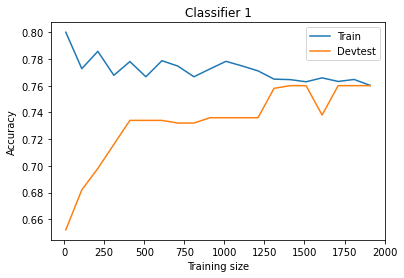

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy1, label='Train')
plt.plot(nsamples, devtest_accuracy1, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 1')
plt.legend()

### This plot shows that there is overfitting, no matter the training size.

In this other plot overfitting drops as we increase the size of training data, but some overfitting remains when training with 2000 samples of training data.

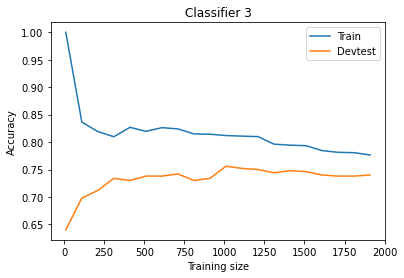

In [24]:
plt.plot(nsamples,train_accuracy3, label='Train')
plt.plot(nsamples,devtest_accuracy3, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 3')
plt.legend()

## Gender classifier in Scikit-learn

In [25]:
from sklearn.naive_bayes import MultinomialNB
def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result = [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i >= 0:
        result[i] = 1
    else:
        result[len(alphabet)] = 1 # if the character is out of the alphabet
    return result
def gender_features(word):
    "Return the one-hot encoding of the last two characters"
    assert len(word) >= 2
    last = one_hot_character(word[-1])
    secondlast = one_hot_character(word[-2])
    return secondlast + last

Strictly speaking, the function `one_hot_character` is not the one-hot encoding because it lists the presence of two characters. In other words, the resulting vectors will have two ones (or just 1 if the last 2 characters of the word are the same).

In [26]:
gender_features("Mary")

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [27]:
train_set = [(gender_features(n), g) for n, g in train_names]
devtest_set = [(gender_features(n), g) for n, g in devtest_names]
test_set = [(gender_features(n), g) for n, g in test_names]
train_X, train_y = zip(*train_set)
classifier = MultinomialNB()
classifier.fit(train_X, train_y)
devtest_X, devtest_y = zip(*devtest_set)
classifier.predict(devtest_X[:5])

array(['female', 'female', 'female', 'female', 'male'], dtype='<U6')

In [28]:
from sklearn.metrics import accuracy_score
devtest_predictions = classifier.predict(devtest_X)
accuracy_score(devtest_y, devtest_predictions)

0.752